# Improved XGBoost Model with Feature Engineering

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load dataset
df = pd.read_csv("retail_store_inventory.csv")
df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

# Feature engineering
df['Discount'] = df['Discount'] / 100.0
df['Price_After_Discount'] = df['Price'] * (1 - df['Discount'])
df['Is_Promo'] = ((df['Holiday/Promotion'] == 1) | (df['Discount'] > 0)).astype(int)

# Encode 'Category'
df = pd.get_dummies(df, columns=['Category'], drop_first=True)

# Encode other categorical variables
df = pd.get_dummies(df, columns=['Region', 'Seasonality', 'Weather Condition'], drop_first=True)

# Feature selection
features = [
    'Price', 'Discount', 'Competitor Pricing', 'Holiday/Promotion', 'Inventory Level',
    'Price_After_Discount', 'Is_Promo'
] + [col for col in df.columns if 'Category_' in col or 'Region_' in col or 
     'Seasonality_' in col or 'Weather Condition_' in col]

X = df[features]
y = df['Units Sold']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Train XGBoost model
model = XGBRegressor(objective='reg:squarederror', random_state=42,
                     n_estimators=200, max_depth=5, learning_rate=0.05)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R-squared:", r2)
print("RMSE:", rmse)


R-squared: 0.3412721484363317
RMSE: 88.3126082709271


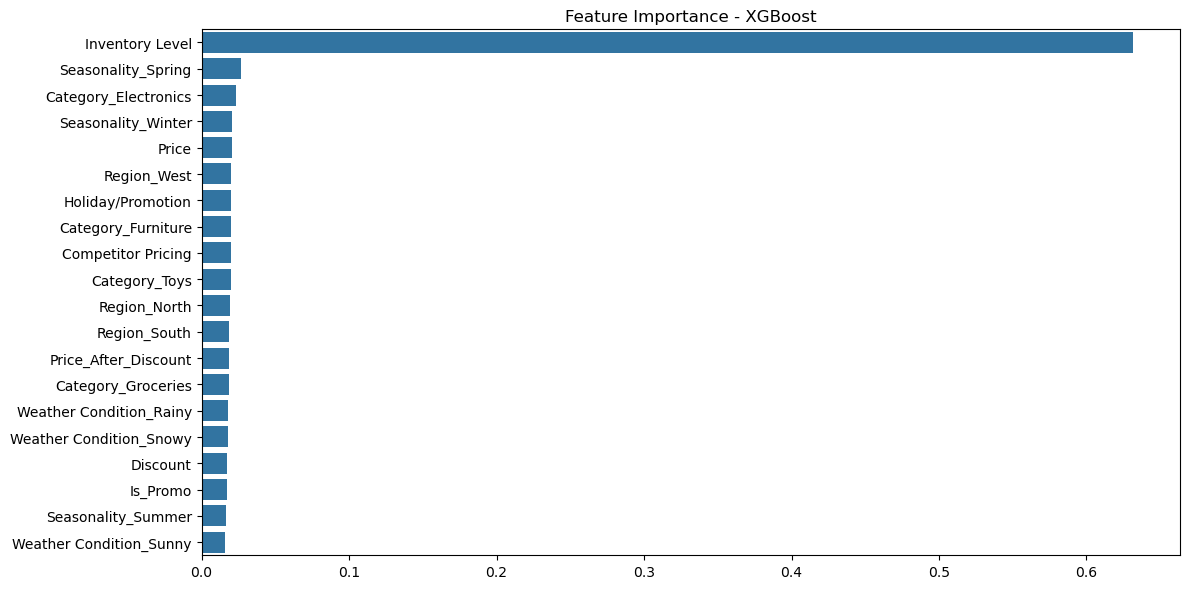

In [5]:
# Plot feature importance
plt.figure(figsize=(12, 6))
importance = model.feature_importances_
sorted_idx = np.argsort(importance)[::-1]
sns.barplot(x=importance[sorted_idx], y=np.array(X.columns)[sorted_idx])
plt.title("Feature Importance - XGBoost")
plt.tight_layout()
plt.show()
